In [19]:
import sqlalchemy as db
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd

from database.config import *

engine = create_engine(f'postgresql://{DB_USER}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
# Session = sessionmaker(bind=engine) 

connection = engine.connect()
metadata = db.MetaData()
scores = db.Table('scores', metadata, autoload=True, autoload_with=engine)
#Equivalent to 'SELECT * FROM census'
query = db.select([scores]) 
scores_list = connection.execute(query).fetchall()


# print(scores_list)

scores_columns = ["Name", "Golfer 1", "Golfer 2", "Golfer 3", "Score"]
df = pd.DataFrame(data=scores_list, columns=scores_columns)

# df.head()

df["Difference"] = df["Score"].max()-df["Score"]

<AxesSubplot:ylabel='Name'>

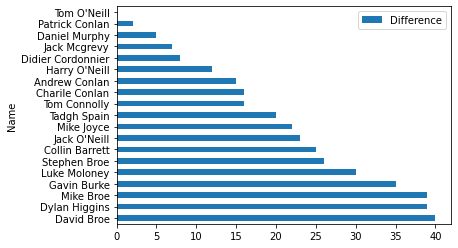

In [20]:
df.plot.barh(x='Name', y='Difference')